In [7]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_swoop = pd.read_csv('/content/drive/MyDrive/DS_Proj/airline_reviews-main/Swoop_airlines.csv')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_swoop['Recommended_bin'] = np.where(df_swoop['Recommended'] == 'yes', 1, 0)
df_swoop.describe()

,Unnamed: 0,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating,Review_score_nltk,Review_score,Recommended_bin
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,106475.516405,0.462197,0.650499,1.891583,3.012839,1.834522,2.122682,2.108417,0.567760,0.380884,0.192582,0.231098
std,577.143757,1.038026,1.252068,1.634346,3.287831,1.527278,1.791826,1.599000,1.195247,0.485951,0.394609,0.421836
min,105641.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,105945.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,106361.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,107062.000000,1.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,107411.000000,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000


In [9]:
# Splitting the dataset into training and testing sets
features = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'Review_score_nltk', 'Review_score', 'OverallScore']
X = df_swoop[features]  # Predictor variables
y = df_swoop['Recommended_bin']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [30]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr).round(3)
precision_lr = precision_score(y_test, y_pred_lr).round(3)
recall_lr = recall_score(y_test, y_pred_lr).round(3)
f1_lr = f1_score(y_test, y_pred_lr).round(3)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

In [31]:
auc_lr = roc_auc_score(y_test, y_pred_lr, average='macro')
auc_lr

0.9802188552188552

Metrics of logistic regression: 
Accuracy: 0.986
Precision: 0.97
Recall: 0.97
F1 score: 0.97


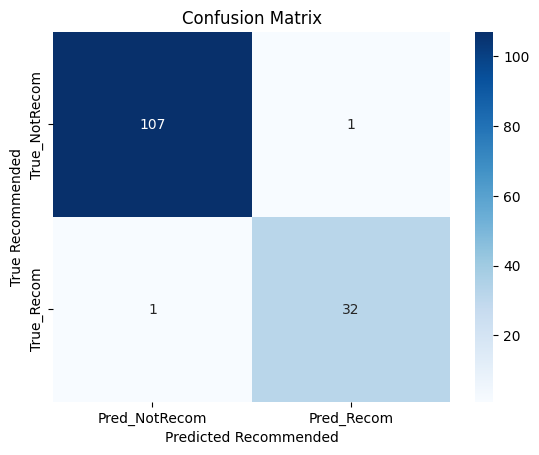

In [15]:
print(f"Metrics of logistic regression: ")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 score: {f1_lr}")

# Create a confusion matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred_NotRecom", "Pred_Recom"], yticklabels=["True_NotRecom", "True_Recom"])
plt.ylabel('True Recommended')
plt.xlabel('Predicted Recommended')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree

In [16]:
# Training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=124)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt).round(3)
precision_dt = precision_score(y_test, y_pred_dt).round(3)
recall_dt = recall_score(y_test, y_pred_dt).round(3)
f1_dt = f1_score(y_test, y_pred_dt).round(3)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)


In [32]:
auc_dt = roc_auc_score(y_test, y_pred_dt, average='macro')
auc_dt

0.9802188552188552

**Cross-val**

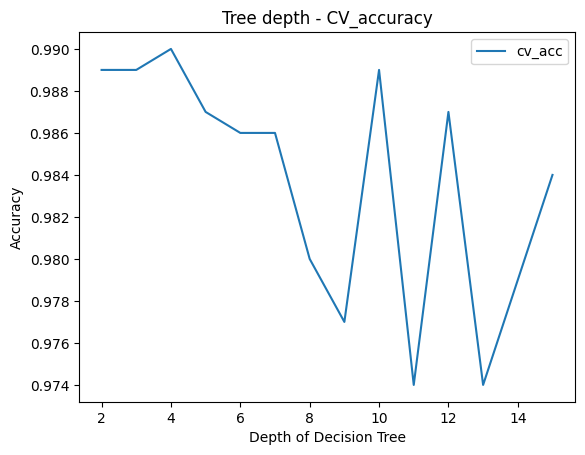

In [17]:
from sklearn.model_selection import cross_val_score
max_depth = 2
max_acc = 0
depths = []
cv = []

for depth in range(2,16):
  depths.append(depth)
  decisionTree = DecisionTreeClassifier(max_depth=depth)
  cv_score = cross_val_score(decisionTree, X, y, scoring="accuracy", cv=5).mean().round(3)
  if cv_score > max_acc:
    max_acc = cv_score
    max_depth = depth
  cv.append(cv_score)

plt.plot(depths, cv, label='cv_acc')

plt.title("Tree depth - CV_accuracy")
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
print(f"Depth of {max_depth} has the higest mean accuracy of {max_acc}.")

Depth of 4 has the higest mean accuracy of 0.99.


## Neural Networks

In [49]:
# We're going to use neural nets to perform classification here
import tensorflow as tf
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])

# Compile the model with binary_crossentropy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

y_pred_prob = model.predict(X_test).ravel()


Epoch 1/50
16/16 [==============================] - 3s 49ms/step - loss: 1.0171 - accuracy: 0.2341 - val_loss: 1.0259 - val_accuracy: 0.1964
Epoch 2/50
16/16 [==============================] - 0s 14ms/step - loss: 0.8558 - accuracy: 0.2341 - val_loss: 0.8664 - val_accuracy: 0.1964
Epoch 3/50
16/16 [==============================] - 0s 15ms/step - loss: 0.7687 - accuracy: 0.2877 - val_loss: 0.7713 - val_accuracy: 0.3214
Epoch 4/50
16/16 [==============================] - 0s 18ms/step - loss: 0.7107 - accuracy: 0.6190 - val_loss: 0.7048 - val_accuracy: 0.6429
Epoch 5/50
16/16 [==============================] - 0s 16ms/step - loss: 0.6681 - accuracy: 0.7679 - val_loss: 0.6527 - val_accuracy: 0.8750
Epoch 6/50
16/16 [==============================] - 0s 15ms/step - loss: 0.6294 - accuracy: 0.8889 - val_loss: 0.6138 - val_accuracy: 0.8929
Epoch 7/50
16/16 [==============================] - 0s 11ms/step - loss: 0.5954 - accuracy: 0.9226 - val_loss: 0.5702 - val_accuracy: 0.9107
Epoch 8/50
16

In [55]:
# Calculate the AUC
auc_nn = roc_auc_score(y_test, y_pred_prob, average='macro')
loss, accuracy_nn = model.evaluate(X_test, y_test, verbose=0)

print(auc_nn)
print(accuracy_nn)

0.9985970819304152
0.9929078221321106


# Choose Logistic Regression as our model
According to the Occam’s Razor, since the models performance are very close to each other, we will pick the simplest model from the three, which is Logistic Regression!
Then we will do some model improvement including: Finding the optimal hyperparameter, data normalization and feature penalization to avoid over-fitting and improve the model performance even more!


In [47]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.describe())

       EntertainmentRating  FoodRating  GroundServiceRating  \
count           560.000000  560.000000           560.000000   
mean              0.482143    0.682143             1.910714   
std               1.074856    1.289438             1.625785   
min               0.000000    0.000000             0.000000   
25%               0.000000    0.000000             1.000000   
50%               0.000000    0.000000             1.000000   
75%               1.000000    1.000000             3.000000   
max               5.000000    5.000000             5.000000   

       SeatComfortRating  ServiceRating  ValueRating  WifiRating  \
count         560.000000     560.000000   560.000000  560.000000   
mean            1.826786       2.139286     2.110714    0.569643   
std             1.514508       1.797999     1.602288    1.207671   
min             0.000000       0.000000     1.000000    0.000000   
25%             1.000000       1.000000     1.000000    0.000000   
50%             1.000000

In [56]:
from sklearn.linear_model import LogisticRegression

# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X_train, y_train)

# L2 Regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(X_train, y_train)

# Elastic Net Regularization
model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)
model_elasticnet.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

y_pred_l1 = model_l1.predict(X_test)
y_pred_l2 = model_l2.predict(X_test)
y_pred_en = model_elasticnet.predict(X_test)

accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
accuracy_en = accuracy_score(y_test, y_pred_en)
print("Accuracy L1 Regularized Model:", accuracy_l1)
print("Accuracy L2 Regularized Model:", accuracy_l2)
print("Accuracy EN Regularized Model:", accuracy_en)


Accuracy L1 Regularized Model: 0.9858156028368794
Accuracy L2 Regularized Model: 0.9858156028368794
Accuracy EN Regularized Model: 0.9858156028368794


In [60]:
print("Classification Report for L1 Regularized Model:")
print(classification_report(y_test, y_pred_l1))

print("Classification Report for L2 Regularized Model:")
print(classification_report(y_test, y_pred_l2))

print("Classification Report for EN Regularized Model:")
print(classification_report(y_test, y_pred_en))

Classification Report for L1 Regularized Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.97      0.97      0.97        33

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141

Classification Report for L2 Regularized Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.97      0.97      0.97        33

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141

Classification Report for EN Regularized Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.97      0.97      0.97        33

    accuracy                          

In [62]:
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix L1 Regularized Model:\n", conf_matrix_l1)
print("Confusion Matrix L2 Regularized Model:\n", conf_matrix_l2)
print("Confusion Matrix EN Regularized Model:\n", conf_matrix_en)


Confusion Matrix L1 Regularized Model:
 [[107   1]
 [  1  32]]
Confusion Matrix L2 Regularized Model:
 [[107   1]
 [  1  32]]
Confusion Matrix EN Regularized Model:
 [[107   1]
 [  1  32]]


In [67]:
# Assuming binary classification, get probability scores
y_prob_l1 = model_l1.predict_proba(X_test)[:, 1]
y_prob_l2 = model_l2.predict_proba(X_test)[:, 1]
y_prob_en = model_elasticnet.predict_proba(X_test)[:, 1]

roc_auc_l1 = roc_auc_score(y_test, y_prob_l1)
roc_auc_l2 = roc_auc_score(y_test, y_prob_l2)
roc_auc_en = roc_auc_score(y_test, y_prob_en)
print("ROC-AUC Score L1 Regularized Model:", roc_auc_l1)
print("ROC-AUC Score L2 Regularized Model:", roc_auc_l2)
print("ROC-AUC Score EN Regularized Model:", roc_auc_en)


ROC-AUC Score L1 Regularized Model: 0.999438832772166
ROC-AUC Score L2 Regularized Model: 0.9994388327721662
ROC-AUC Score EN Regularized Model: 0.999438832772166


Applying different regularization makes the model performe basically the same, so we will pick L1 regularization here. Then we will find a optimal hyperparameter for logistic regression!

In [68]:
max_auc = 0

# Define a list of values for the hyperparameter C
C_values = [10, 20, 50, 100, 150, 200]

for C in C_values:
  logistic_regression = LogisticRegression(C=C, max_iter=1000)
  logistic_regression.fit(X_train, y_train)

  avg_auc = cross_val_score(logistic_regression, X, y, cv=10, scoring="roc_auc", n_jobs=-1).mean().round(4)

  if(avg_auc > max_auc):
    max_auc = avg_auc
    best_C = C

print(f"Best AUC: {avg_auc}, associated C: {best_C}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best AUC: 0.9918, associated C: 10


And after iterating through C_values, we find the optimal C related to logistic regression will be C=10, and we improve AUC from 0.980 to 0.9918!